In [25]:
import os 
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import seaborn as sns

In [2]:
filter(os.path.isfile, os.listdir( '../results' ) )

[]

In [3]:
files = os.listdir( '../results' )

In [4]:
concat_df = pd.DataFrame()
for each_file in files:
    df = pd.read_csv( "../results/" + each_file,header=None,names=['content','y_pred','y'])
    df['model'] = each_file
    concat_df=concat_df.append(df)

In [5]:
concat_df.head()

,content,y_pred,y,model
0,folk visit stay pari agre excit tri thi place ...,0.053185,0,sentiment_model_1_128_1_1000_leakyrelu_results...
1,awesom job bent rim need straighten fast respo...,1.000000,1,sentiment_model_1_128_1_1000_leakyrelu_results...
2,ive come freed faith decad locat time wa got f...,0.000080,0,sentiment_model_1_128_1_1000_leakyrelu_results...
3,recent stay mgm grand hotel pool notic onli re...,0.998077,1,sentiment_model_1_128_1_1000_leakyrelu_results...
4,price dri sandwich cramp spot crappi park angi...,0.002384,0,sentiment_model_1_128_1_1000_leakyrelu_results...


In [8]:
each_file.split('_')[3]

'64'

In [11]:
list_metric = []
for each_file in files:
    metric_df = concat_df[concat_df['model']==each_file]

    param1= each_file.split('_')[2]
    param2=each_file.split('_')[3]
    param3=each_file.split('_')[4]
    param4=each_file.split('_')[5]
    param5=each_file.split('_')[6]
#     print each_file
#     print classification_report(metric_df['y'], metric_df['y_pred'].round(0))
    metric_auc = roc_auc_score(metric_df['y'], metric_df['y_pred'])
    metric_f1 = f1_score(metric_df['y'], metric_df['y_pred'].round(0))
    list_metric.append([param1,param2,param3,param4,param5,metric_auc,metric_f1])

In [34]:
result_metrics = pd.DataFrame(list_metric,columns=['conv_layers','filter_size','kernel_size','embedding_size','activation','auc','f1']).sort_values('auc',ascending=False)
result_metrics

,conv_layers,filter_size,kernel_size,embedding_size,activation,auc,f1
14,1,128,3,500,leakyrelu,0.981056,0.961373
20,1,128,4,500,leakyrelu,0.980781,0.961931
31,1,128,5,750,relu,0.980676,0.960395
84,1,64,4,750,leakyrelu,0.980380,0.959814
30,1,128,5,750,leakyrelu,0.980054,0.963022
85,1,64,4,750,relu,0.980015,0.958409
12,1,128,3,1000,leakyrelu,0.979830,0.960821
89,1,64,5,500,relu,0.979686,0.957884
46,1,32,3,500,leakyrelu,0.979640,0.959894
15,1,128,3,500,relu,0.979629,0.961523


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

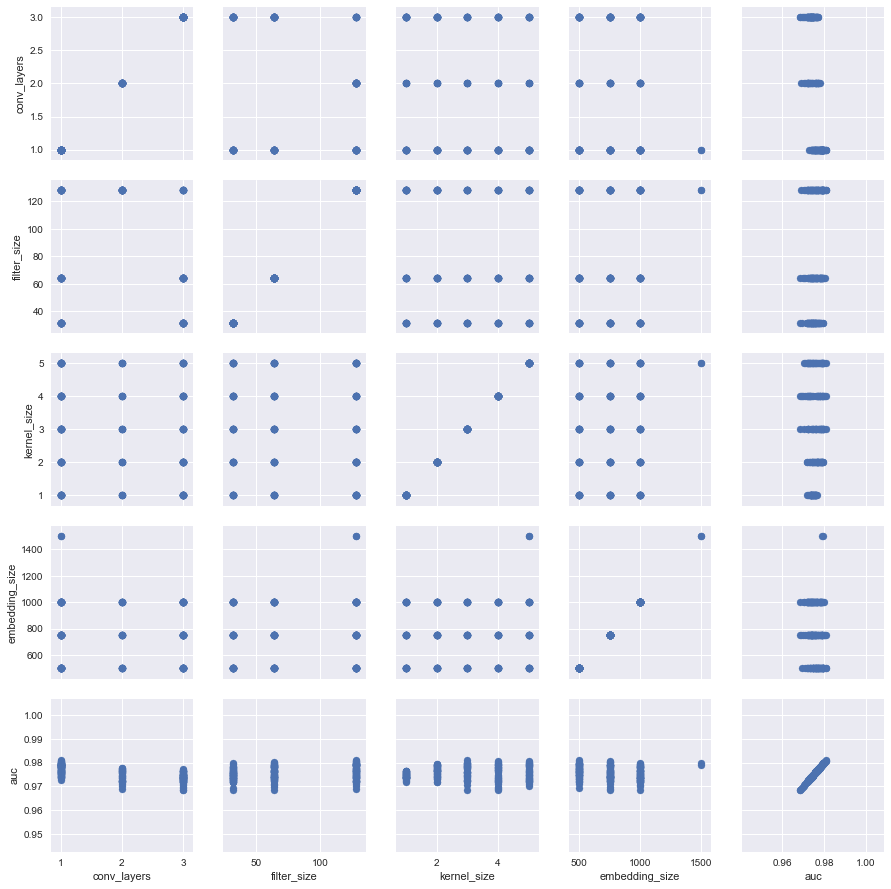

In [44]:
g = sns.PairGrid(result_metrics[['conv_layers','filter_size','kernel_size','embedding_size','activation','auc']])
g = g.map(plt.scatter)

In [42]:
result_metrics[result_metrics['embedding_size']=='1500']

,conv_layers,filter_size,kernel_size,embedding_size,activation,auc,f1
26,1,128,5,1500,leakyrelu,0.979626,0.961234
27,1,128,5,1500,relu,0.979065,0.959732


In [24]:
pd.DataFrame(list_metric,columns=['conv_layers','filter_size','kernel_size','embedding_size','activation','auc','f1']).sort_values('auc',ascending=False).to_csv('metrics_result.csv',index=False)